<a href="https://colab.research.google.com/github/Rusulabbas/219-FINAL/blob/main/Data_Collection_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Rusulabbas/219-FINAL/main/ObesityDataSet.csv'
df = pd.read_csv(url)

#dropping all na values
df=df.dropna()
df.drop(['Age'], axis=1)

#printing the first 15 rows of the dataframe
df.head(15)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
#checking if there are any missing values
missing_values = df.isnull().sum()
print(missing_values)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [4]:
#data types of each column
print(df.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


### We can see that the catagroical variables are;
*   Gender
*   family_history_with_overweight
*   FAVC
*   CAEC
*   SMOKE
*   SCC
*   CALC
*   MTRANS
*   NObeyesdad
###The quanitiave coloums are;
*   Age
*   Height
*   weight
*   FCVC
*   CH2O
*   FAF
*   TUE
*   NCP








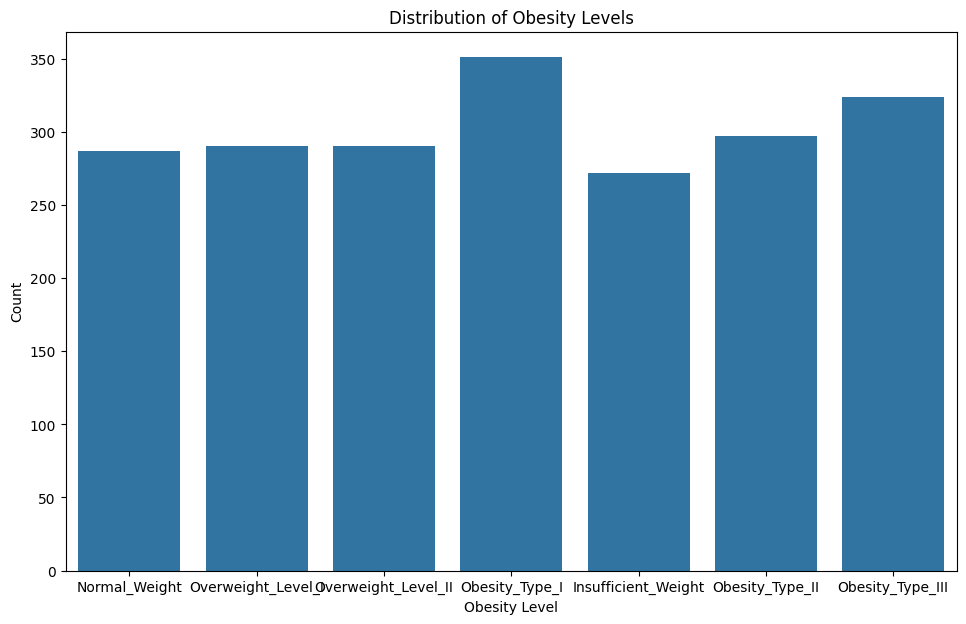

In [5]:
# Bar plot of obesity levels
plt.figure(figsize=(11.5, 7))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

x - axis is obesity level
y - axis is count

We have th folowing catagories  Normal_Weight
Overweight_Level_I
Overweight_Level_II
Obesity_Type_I
Insufficient_Weight
Obesity_Type_II
Obesity_Type_III

In [ ]:
#Pair plot to visualize all the variables in the dataframe with other vairabvles and we set the column 'NObeyesdad' which shows how different categories of that variable affect the relationships between the other variables.
sns.pairplot(df, hue='NObeyesdad')
plt.show()

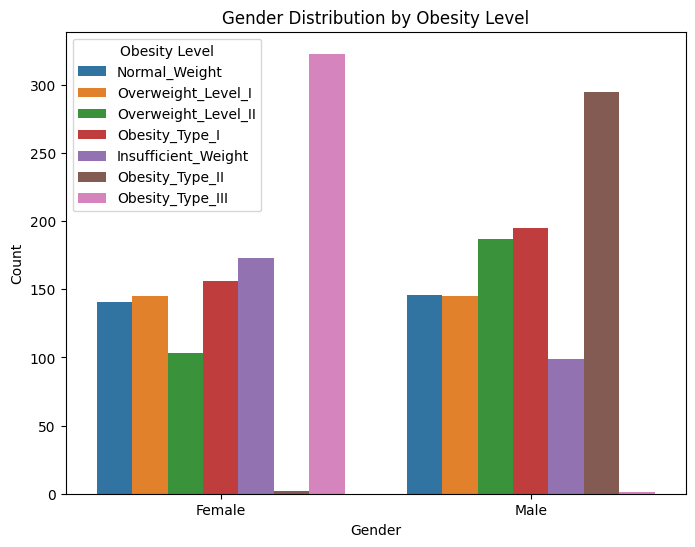

In [7]:
plt.figure(figsize=(8, 6)) #Size of the figure
sns.countplot(data=df, x='Gender', hue='NObeyesdad') #Creating a countplot to visualize the distribution of SCC by obesity level
plt.title('Gender Distribution by Obesity Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Obesity Level')

plt.show()

Gender Vs Count
1. Female Key points:
- The highest counts are in obesity "Overweight_Level_Il" and "Insufficient_Weight"
- "Overweight_Level_II" and "Normal_Weight" have the low values
- The "Obesity_Type_IlI" category has the lowest count in total
2. Male Key Points:
- - "Obesity_Type_IlI," is higher than the female count.
- "Obesity_Type_I," is the second highest among males
- "Obesity_Type_II" has fewer individuals than the overweight categories.
- "Obesity_Type_III" has the lowest count in total for all males
3. Overall, the chart shows that:
- For both genders, "Normal_Weight" have similar counts
- Male count seems to have a higher count for most of the obesity levels.
This graph can help by showing the frequency of different obesity levels between Male and Female.


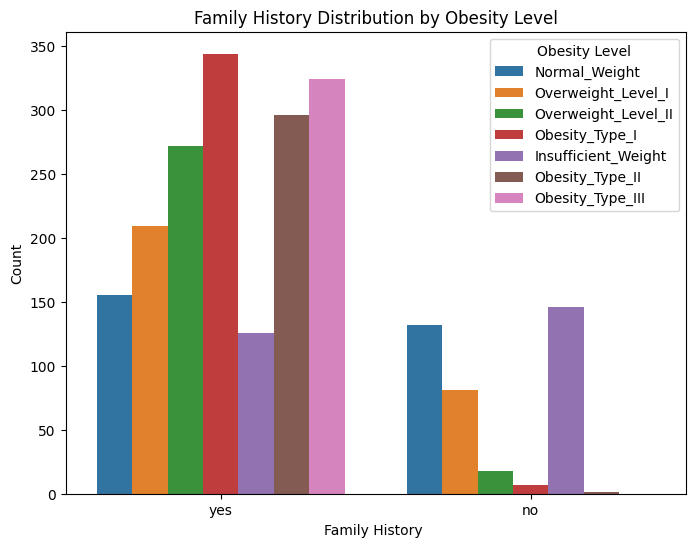

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad') #Creating a countplot to visualize the distribution of family_history_with_overweight by obesity level
plt.title('Family History Distribution by Obesity Level')
plt.xlabel('Family History ')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Family History VS Count

Key points:
1. Family History - Yes:
- "Obesity_Type_I" has the highest count.
- "Obesity_Type_II" and "Obesity_Type_III"  both has high counts besides “Obesity_Type_I”
- The counts for "Overweight_Level_lI", "Insufficient_Weight", have the lowest count compared to the rest of the obesity levels.
2. Family History - No:
- "Insufficient_Weight" category has the highest count against all the groups
- "Normal_Weight" comes in as second highest with family history without being overweight.
- The lowest counts for no family history with overweight are “Obesity_Type_III”,”Obesity_Type_II” “Obesity_Type_I” with ”Obesity_Type_II” being the lowest.
3. The graph shows that there is probably a relationship between high obesity levels and a family history of being overweight.  For example, most of the yes responses have "Obesity_Type_l"


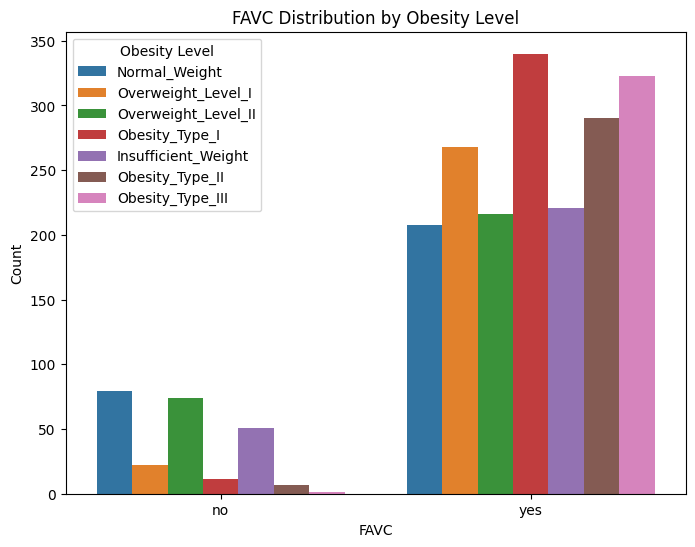

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FAVC', hue='NObeyesdad') #Creating a countplot to visualize the distribution of FAVC by obesity level
plt.title('FAVC Distribution by Obesity Level')
plt.xlabel('FAVC')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Requently consume high caloric food (FAVC) vs. Count
Key Points:

1. FAVC - No:
- The "Normal_Weight" category has the highest count
- The other categories, including "Obesity_Type_III," "Obesity_Type_II," have the least count for frequent consumption of high calorie food

2. FAVC - Yes:
- The "Obesity_Type_I" category has the highest count
- The "Normal_Weight" category has a lower count compared to all obesity levels.
- "Insufficent_Weight", "Overweight_Level_II," and "Normal_Weight" have about the same frequency of high calorie food.
3. The bar chart shows high-calorie food intake across the different obesity levels. This data gives evidence to the that nutrition, the frequency with high-calorie  can play an important part in obesity.


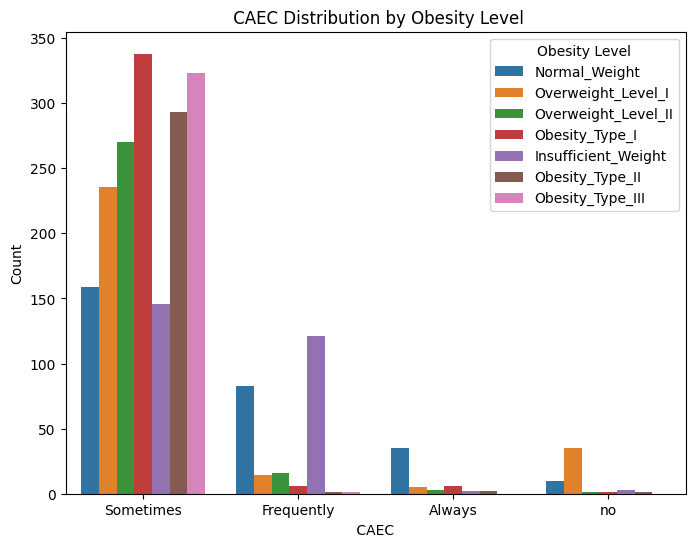

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CAEC', hue='NObeyesdad') #Creating a countplot to visualize the distribution of CAEC by obesity level
plt.title('FAVC Distribution by Obesity Level')
plt.title(' CAEC Distribution by Obesity Level')
plt.xlabel(' CAEC ')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Consumption of Food between Meals vs Count
Key Points:
1. Sometimes:
- "Obesity_Type_I" and “Overweight_Level_II” has the highest count between the counts of 300-350
- The "Insufficient_Weight" has the lowest count at about 150
2. Frequently:
- The "Insufficient_Weight" category has the highest count at slightly under 150
- Counts for ""Obesity_Type_Il" "Obesity_Type_Il," have the lowest found at close to 0
3. Always:
- The counts for all variables are low, the highest being “Normal_Weight” at under 50 counts
4. No:
- Overall, the no responses has the lowest out of all answers with below 150 “Overweight_Level_l” being the highest at under 50 counts
5. The graph shows a pattern that obese people eat more often. The information shows a relationship between higher obesity rates and more frequent eating between meals.


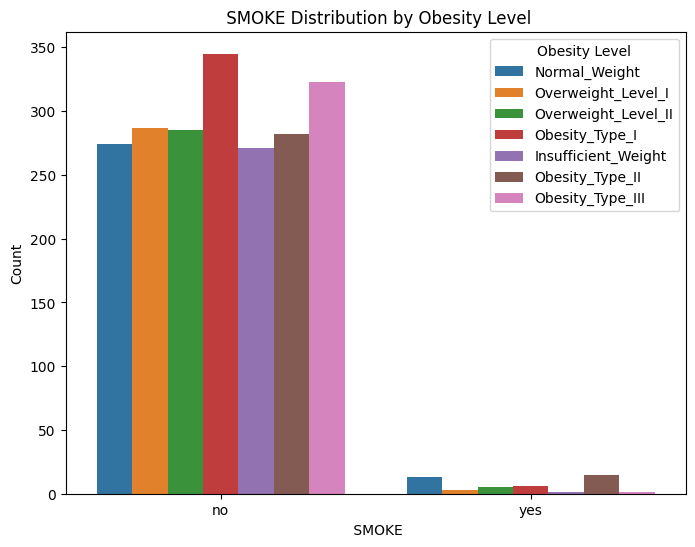

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad') #Creating a countplot to visualize the distribution of SMOKE by obesity level
plt.title(' SMOKE Distribution by Obesity Level')
plt.xlabel(' SMOKE')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Smoking with Overweight vs. Count
Key observations:
1. Non-Smokers (no):
- "Obesity_Type_I" has the highest slightly below 350
- “Normal_Weight” has the lowest count at compared to call in the middle of 200 - 300
- "Overweight_Level_l", "Overweight_Level_ll", and "Insufficient_Weight" are all fairly equal to each other at slightly under 300.

2. Smokers (yes):
- The counts for all Obesity Levels are fairly low.
- "Obesity_Type_Il" and “Normal_Weight” individuals have the highest compared to the rest but still under 50.
“- Insufficient_Weight” and “Obesity_Type_lll” have the lowest counts close to zero.

3. This graph shows nonsmokers are more common than smokers at all obesity levels. This also shows that smoking could possibly not be the best predictor as both responses had a spread out relationship


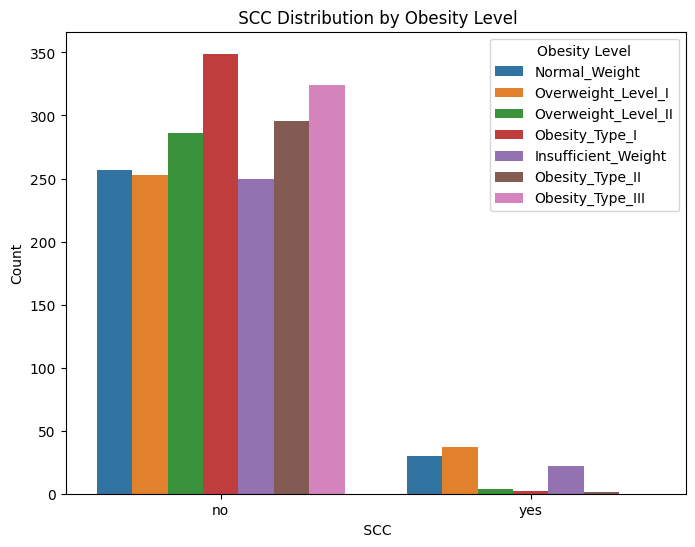

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SCC', hue='NObeyesdad')
plt.title(' SCC Distribution by Obesity Level')
plt.xlabel(' SCC')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()


 Self-Monitoring of Caloric Consumption. (SCC) vs. Counts
Key Points.
1. SCC - No:
- The "Obesity_Type_I" category has the highest count at nearly 350
- "Obesity_Type_III" and "Obesity_Type_II" categories have the next highest counts. Both between 300 and 350
- “Insufficient_Weight has the lowest count at about 250
2. SCC - Yes:
- Across all obesity types, the counts are fairly low are 50 counts or less
- "Obesity_Type_III" and - "Obesity_Type_II" categories have the lowest counts at close to zero.

 3. Keeping track of calories is not something the majority of people do. Especially those who were obese. This data shows the value of calorie tracking as a weight control strategy, which may be helpful for health efforts and predicting obesity


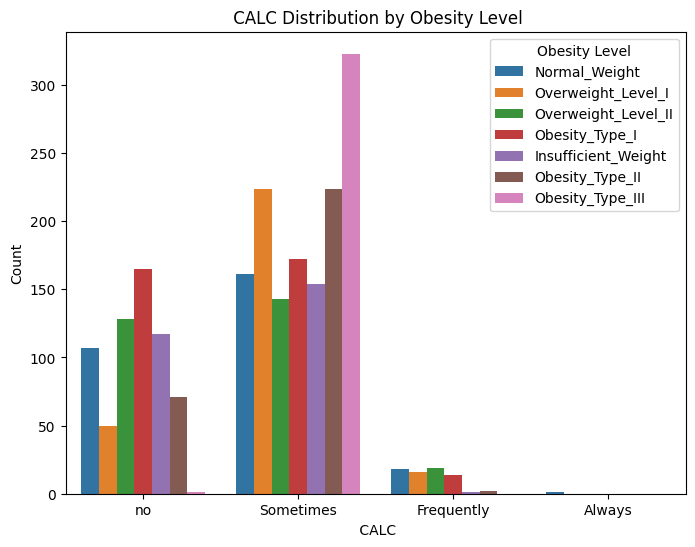

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CALC', hue='NObeyesdad')#Creating a countplot to visualize the distribution of CALC by obesity level
plt.title(' CALC Distribution by Obesity Level')
plt.xlabel(' CALC')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Alcohol consumption habits Vs. Counts  (CALC).
Key Points:
1. No Alcohol Consumption (no):
- The "Obesity_Type_l" category has the highest count in the middle of 150 and 200
- "Overweight_Level_lI" and "Insufficient_Weight" have the next highest counts both under 150
- "Obesity_Type_III" has the lowest count at close to zero.
2. (Sometimes):
- "Obesity_Type_Ill" has the highest count
- "Overweight_Level_I" and “Obesity_Type_II” seem to have equal counts at about 200
- "Insufficient_Weight" has the lowest count compared to the rest.

3. Frequent Alcohol Consumption (Frequently):
- All counts are below 50
- “Normal_Weight”,”Overweight_level_l”, “Obesity_Type_I”, and Overweight_Level_I. All have similar counts.
- “Insufficient_Weight” and “Obesity_Type_Ill” have the lowest at zero count

4. Regular Alcohol Consumption (Always):
- Almost all of the obesity levels are close to zero.
- “Normal_Weight” is the highest.

5. This graph shows the alcohol consumption levels of all obesity levels. This is important to show if alcohol has an impact on obesity level.


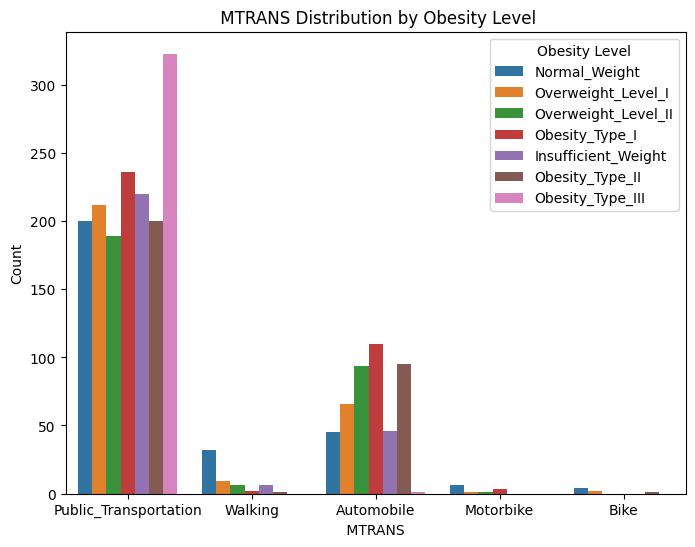

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MTRANS', hue='NObeyesdad') #Creating a countplot to visualize the distribution of MTRANS by obesity level
plt.title(' MTRANS Distribution by Obesity Level')
plt.xlabel(' MTRANS ')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.show()

Main form of transportation (MTRANS). V.S Count

Key Points:
1. Public Transportation:
- The "Obesity_Type_Ill" group has the highest count at above 300
-"Overweight_Level_II" has the lowest count at barley under 200
2. Walking:
- All levels of obesity have low counts in walking, all under 50 counts.
- "Normal_Weight" individuals have the highest count at about 30
- The lowest counts are within “Obesity_Type_lll” and “Obesity_Type_ll” at about zero.
3. Automobile:
- Seems to be the second most used form of transportation
- “Obesity_Type_l” and “Obesity_Type_ll” have the highest count
- “Obesity_Type_lll” has the lowest count.
4. Motorbike:
- All counts are low, below 50
- “Normal_Weight” and “Obesity_Type_l” have the highest at about 10
- The rest are at nearly zero
5. Bike:
- Biking has the least count compared to all forms of transportation.
- “Normal_Weight” has the highest at about 5
- The rest are nearly zero
6. This chart shows that the main form of transportation from all levels of obesity is public transportation. The most unused form of transportation is bikes. This is helpful to see the correlation between transportation and obesity level.


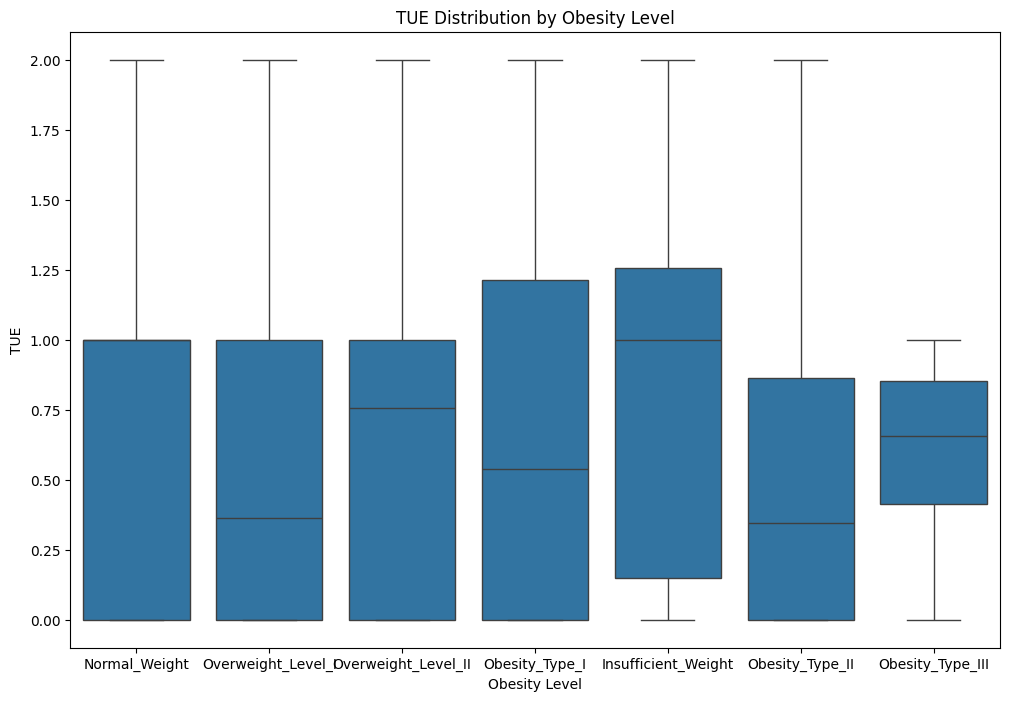

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='NObeyesdad', y='TUE')  # Creating a boxplot to visualize the distribution of TUE by obesity level
plt.title('TUE Distribution by Obesity Level')
plt.ylabel('TUE')
plt.xlabel('Obesity Level')
plt.show()

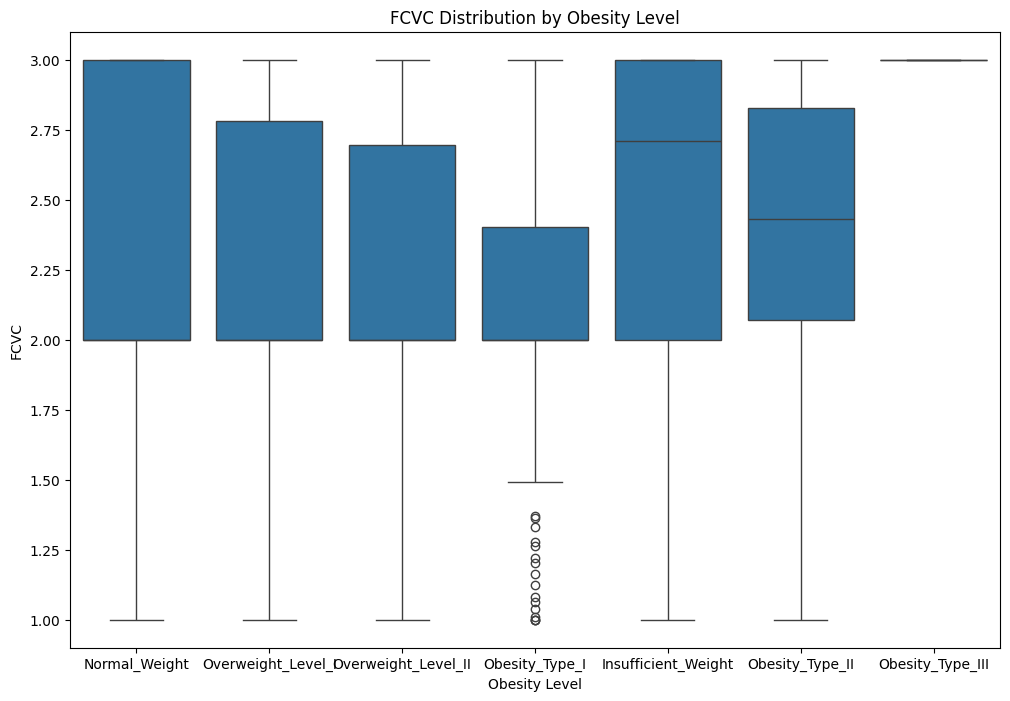

In [16]:
plt.figure(figsize=(12, 8)) #Figure size
sns.boxplot(data=df, x='NObeyesdad', y='FCVC')  # Creating a boxplot to visualize the distribution of FCVC by obesity level
plt.title('FCVC Distribution by Obesity Level')
plt.ylabel('FCVC')
plt.xlabel('Obesity Level')
plt.show()

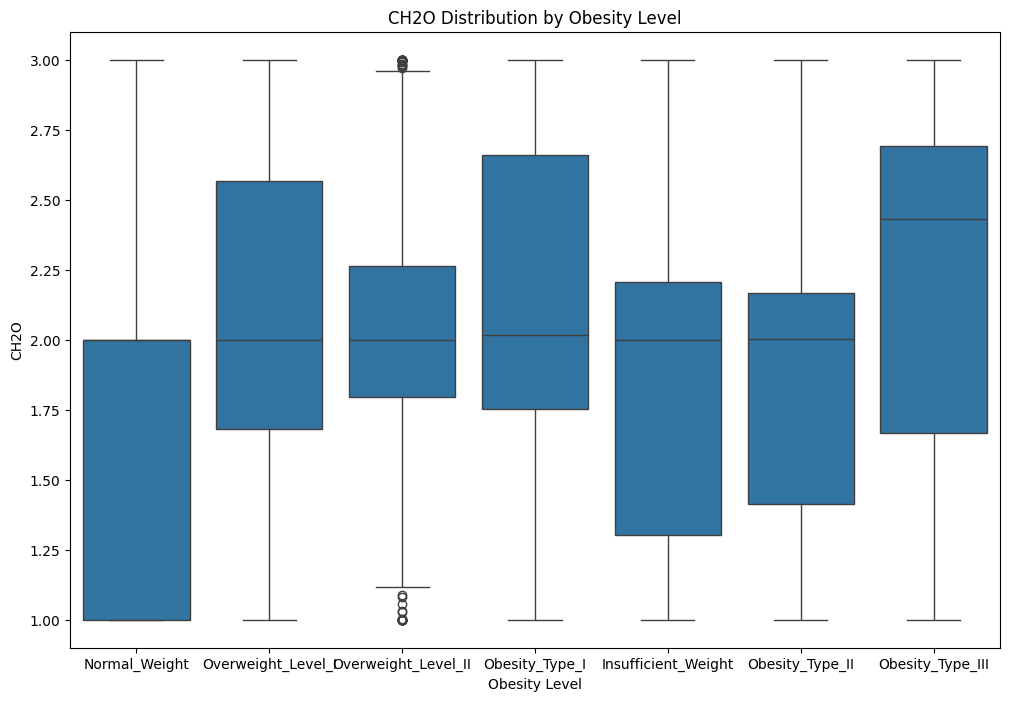

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='NObeyesdad', y='CH2O')# Creating a boxplot to visualize the distribution of CH20 by obesity level
plt.title('CH2O Distribution by Obesity Level')
plt.ylabel('CH2O')
plt.xlabel('Obesity Level')
plt.show()

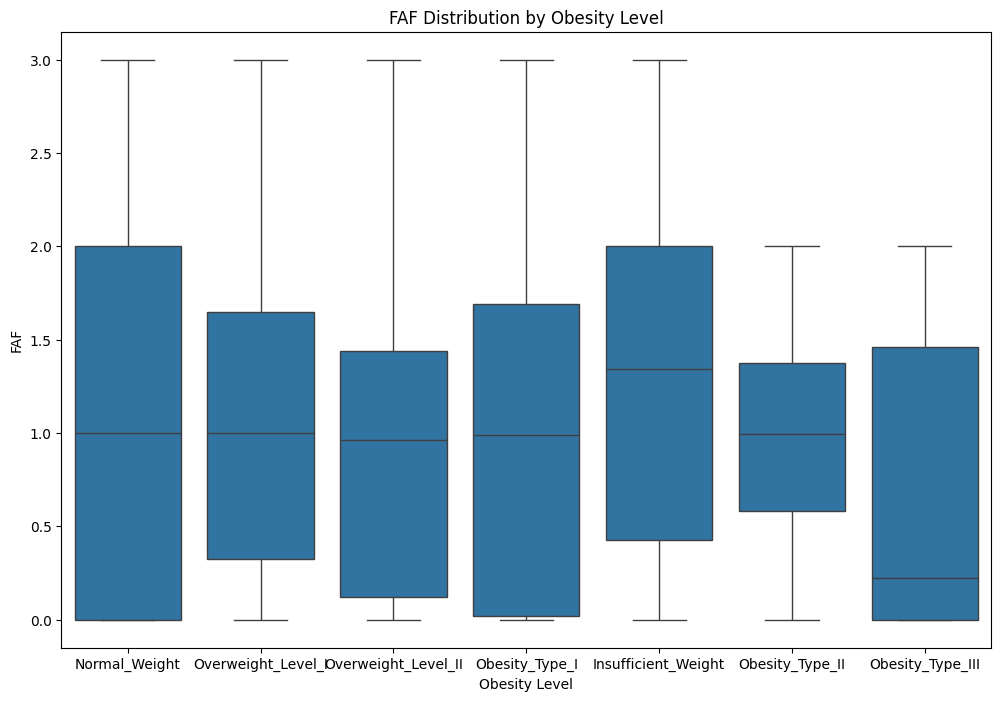

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='NObeyesdad', y='FAF')  # Creating a boxplot to visualize the distribution of FAF by obesity level
plt.title('FAF Distribution by Obesity Level')
plt.ylabel('FAF')
plt.xlabel('Obesity Level')
plt.show()

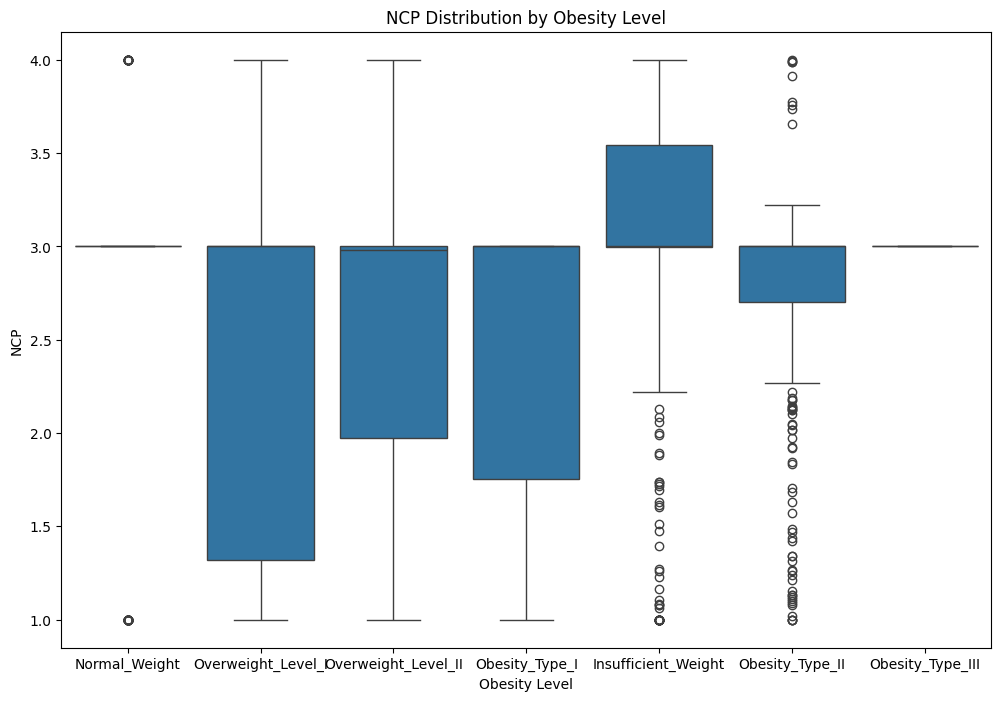

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='NObeyesdad', y='NCP') # Creating a boxplot to visualize the distribution of NCP by obesity level
plt.title('NCP Distribution by Obesity Level')
plt.ylabel('NCP')
plt.xlabel('Obesity Level')
plt.show()

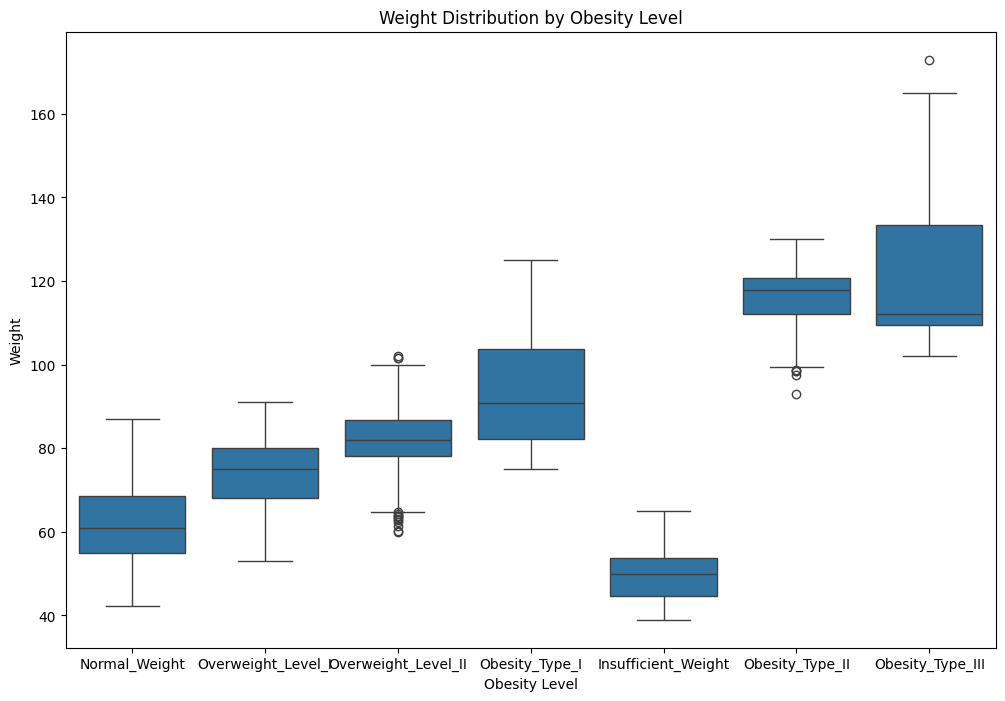

In [20]:
plt.figure(figsize=(12, 8)) # Figure size
sns.boxplot(data=df, x='NObeyesdad', y='Weight') # Creating a boxplot to visualize the distribution of weight by obesity level
# Adding title and axis labels to the plot
plt.title('Weight Distribution by Obesity Level')
plt.ylabel('Weight')
plt.xlabel('Obesity Level')
plt.show()
